In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
%matplotlib inline

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#Extract MNIST data
x_train = mnist.train.images
y_train = mnist.train.labels

X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])

costs = []

In [3]:
#hyperparameters

learning_rate = 0.1
training_epoches = 50
batch_size = 1000
total_batch = int(mnist.train.num_examples/batch_size)
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784,16]))
b1 = tf.Variable(tf.random_normal([16]))

W2 = tf.Variable(tf.random_normal([16,14]))
b2 = tf.Variable(tf.random_normal([14]))

W3 = tf.Variable(tf.random_normal([14,10]))
b3 = tf.Variable(tf.random_normal([10]))

In [4]:
#Forword propagation
A1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)
A2 = tf.nn.sigmoid(tf.matmul(A1,W2) + b2)
Y_ = tf.nn.softmax(tf.matmul(A2,W3) + b3) 

#Cost function
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(Y_),reduction_indices=1))

#Adam Optimizer to minimize the cost
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

#Initializing the variables
init = tf.global_variables_initializer()

cost after epoch 1 : 1.282082
cost after epoch 2 : 0.727150
cost after epoch 3 : 0.527411
cost after epoch 4 : 0.441671
cost after epoch 5 : 0.400298
cost after epoch 6 : 0.329987
cost after epoch 7 : 0.365042
cost after epoch 8 : 0.279728
cost after epoch 9 : 0.263371
cost after epoch 10 : 0.264814
cost after epoch 11 : 0.248346
cost after epoch 12 : 0.254398
cost after epoch 13 : 0.240606
cost after epoch 14 : 0.250922
cost after epoch 15 : 0.219647
cost after epoch 16 : 0.219696
cost after epoch 17 : 0.195738
cost after epoch 18 : 0.220066
cost after epoch 19 : 0.182800
cost after epoch 20 : 0.217637
cost after epoch 21 : 0.182089
cost after epoch 22 : 0.173198
cost after epoch 23 : 0.157127
cost after epoch 24 : 0.230446
cost after epoch 25 : 0.166989
cost after epoch 26 : 0.188525
cost after epoch 27 : 0.179007
cost after epoch 28 : 0.208122
cost after epoch 29 : 0.173501
cost after epoch 30 : 0.191562
cost after epoch 31 : 0.164321
cost after epoch 32 : 0.172649
cost after epoch 

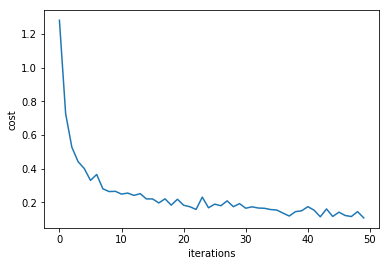

In [5]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Training session
    for epoches in range(training_epoches):
        #Loop over all batches
        for i in range(total_batch):
            xs_batch,ys_batch = mnist.train.next_batch(batch_size)
            sess.run(optimizer,feed_dict={X:xs_batch,Y:ys_batch})
        print("cost after epoch %i : %f"%(epoches+1,sess.run(cost,feed_dict={X:xs_batch,Y:ys_batch}))) 
        costs.append(sess.run(cost,feed_dict={X:xs_batch,Y:ys_batch}))
    
    #accuracy calculation
    correct_prediction = tf.equal(tf.argmax(Y_, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    
    #plotting cost
    plt.plot(costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")